In [2]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.datasets import load_iris


In [4]:
# importing data
df = pd.read_csv('car_prices.csv')
#df.drop(' ', inplace = True,axis=1)

#print(df.head())
#print(df.columns)
print(df)
print(df.columns)




        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0   white   
1         automat

In [ ]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
df.isnull().sum().sum()

123376

In [ ]:
df.isnull()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
558833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558834,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558835,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df2 = df.dropna()
df2

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
df2.drop_duplicates()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
df2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

<Axes: xlabel='model', ylabel='mmr'>

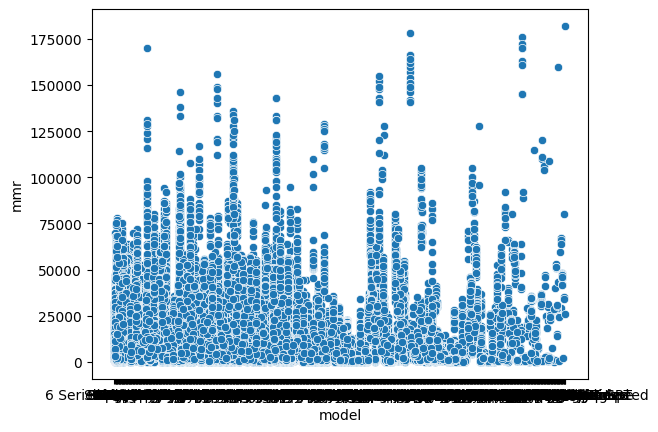

In [ ]:
#sns.scatterplot(x='model',
               # y='mmr', data=df)

sns.scatterplot(x='model',
                y='mmr', data=df2)

In [ ]:
# creating feature variables
#X = df.drop(['vin', 'interior', 'saledate'], axis= 1)
#y = df['state']
#print(X)
#print(y)

X = df2.drop(['vin', 'interior', 'saledate'], axis= 1)
y = df2['state']
print(X)
print(y)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558831  2011     BMW             5 Series         528i      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission state  condition  odometer  color  \
0         automatic    ca        5.0   16639.0  white   
1         automatic    ca        5.0    9393.0  white   


In [ ]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [ ]:
X_train

,year,make,model,trim,body,transmission,state,condition,odometer,color,seller,mmr,sellingprice
542194,2003,Toyota,Avalon,XL,sedan,automatic,wa,2.0,153930.0,blue,purple heart services inc,3025.0,2900.0
7891,2015,Chevrolet,Tahoe,LT,SUV,automatic,ca,5.0,18733.0,silver,enterprise vehicle exchange/orange,41700.0,42750.0
251356,2015,Chevrolet,Equinox,LT,SUV,automatic,il,4.0,18883.0,black,gm/enterprise vehicle exchange,20200.0,25300.0
304768,2003,Chevrolet,Impala,Base,Sedan,automatic,ma,3.0,113242.0,silver,boch honda west,2200.0,1800.0
504200,2013,Nissan,Sentra,SV,sedan,automatic,ga,41.0,29542.0,black,nissan motor acceptance corporation,10800.0,11100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519067,2014,Ford,Focus,SE,sedan,automatic,tx,35.0,31711.0,—,avis budget group,10650.0,13000.0
148159,2012,Kia,Sorento,LX,SUV,automatic,pa,29.0,29706.0,silver,kia motors finance,14800.0,13100.0
515117,2007,BMW,5 Series,550i,sedan,automatic,tx,29.0,98869.0,black,fiserv/sierra auto finance,9525.0,8000.0
363087,2009,Audi,Q7,4.2 Prestige quattro,SUV,automatic,ga,36.0,103654.0,black,thornton road hyundai,18800.0,17300.0


In [ ]:
y_train

542194    wa
7891      ca
251356    il
304768    ma
504200    ga
          ..
519067    tx
148159    pa
515117    tx
363087    ga
545871    pa
Name: state, Length: 448708, dtype: object

In [ ]:
# creating a regression model
model = LinearRegression()


In [ ]:
# fitting the model
##X_train.dtypes
##X_train['column_name'] = pd.to_numeric(X_train['column_name'])
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Toyota'